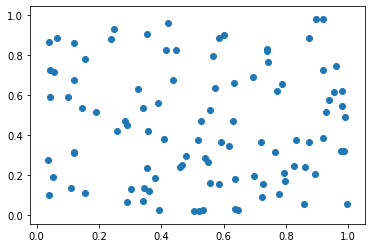

In [8]:
# 通过简单的例子来直接查看K均值聚类的效果
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 聚类前
X = np.random.rand(100, 2)
plt.scatter(X[:, 0], X[:, 1], marker='o')

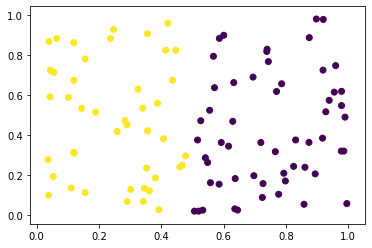

In [9]:
#聚类后
kmeans = KMeans(n_clusters=2).fit(X)
label_pred = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=label_pred)
plt.show()

In [10]:
def distEclud(vecA, vecB):
    '''
    欧氏距离计算函数
    :param vecA:
    :param vecB:
    
    :return: float 
    '''
    dist = 0.0
    # ========= show me your code ==================
    dist = np.sqrt(np.sum(np.square(vecA - vecB)))
    # here
    # ========= show me your code ==================
    return dist



In [11]:
def randCent(dataMat, k):
    '''
    为给定数据集构建一个包含K个随机质心的集合,
    随机质心必须要在整个数据集的边界之内,这可以通过找到数据集每一维的最小和最大值来完成
    然后生成0到1.0之间的随机数并通过取值范围和最小值,以便确保随机点在数据的边界之内
    :param np.dataMat:
    :param k:
    
    :return: np.dataMat
    '''
    # 获取样本数与特征值
    m, n = np.shape(dataMat)
    # 初始化质心,创建(k,n)个以零填充的矩阵
    centroids = np.mat(np.zeros((k, n)))
    print(centroids)
    
    # ========= show me your code ==================
    # 循环遍历特征值
    # here
    for j in range(n):
        minJ = min(dataMat[:, j])
        rangeJ = float(max(dataMat[:, j]) - minJ)
        centroids[:, j] = (minJ + rangeJ * np.random.rand(k, 1))#.flatten()
    
    # ========= show me your code ==================
    
    # 返回质心
    return centroids.A



In [12]:
def kMeans(dataMat, k, distMeas=distEclud):
    '''
    创建K个质心,然后将每个店分配到最近的质心,再重新计算质心。
    这个过程重复数次,直到数据点的簇分配结果不再改变为止
    :param dataMat: 数据集
    :param k: 簇的数目
    :param distMeans: 计算距离
    :return:
    '''
    # 获取样本数和特征数
    m, n = np.shape(dataMat)
    # 初始化一个矩阵来存储每个点的簇分配结果
    # clusterAssment包含两个列:一列记录簇索引值,第二列存储误差(误差是指当前点到簇质心的距离,后面会使用该误差来评价聚类的效果)
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 创建质心,随机K个质心
    centroids = randCent(dataMat, k)

    # 初始化标志变量,用于判断迭代是否继续,如果True,则继续迭代
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # 遍历所有数据找到距离每个点最近的质心,
        # 可以通过对每个点遍历所有质心并计算点到每个质心的距离来完成
        for i in range(m):
            minDist = float("inf")
            minIndex = -1
            for j in range(k):
                # 计算数据点到质心的距离
                # 计算距离是使用distMeas参数给出的距离公式,默认距离函数是distEclud
                distJI = distMeas(centroids[j, :], dataMat[i, :])
                # 如果距离比minDist(最小距离)还小,更新minDist(最小距离)和最小质心的index(索引)
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            
            # 如果任一点的簇分配结果发生改变,则更新clusterChanged标志
            # ========= show me your code ==================
            # here
            if clusterAssment[i, 0] != minIndex: 
                clusterChanged = True
                
            
            # ========= show me your code ==================
            
            # 更新簇分配结果为最小质心的index(索引),minDist(最小距离)的平方
            clusterAssment[i, :] = minIndex, minDist ** 2
        # print(centroids)
        
        
        # 遍历所有质心并更新它们的取值
        # ========= show me your code ==================
        for i in range(k):
            ptsInClust = dataMat[np.nonzero(clusterAssment[:, 0] == i)[0]]
            if(len(ptsInClust) != 0):
                    centroids[i, :] = np.mean(ptsInClust, axis=0) 
        # here
        # ========= show me your code ==================
    
    # 返回所有的类质心与点分配结果
    return centroids, clusterAssment

[[0. 0.]
 [0. 0.]]


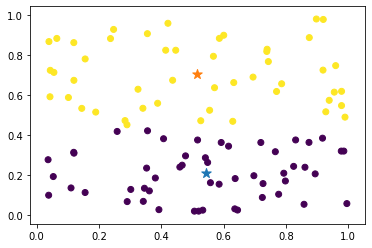

In [13]:
# 运行Kmeans，假设有两聚类中心
center,label_pred = kMeans(X, k=2)

# 将标签转化成易绘图的形式
label = label_pred[:, 0].A.reshape(-1)

# 将结果可视化
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(center[0, 0], center[0, 1], marker="*", s = 100)
plt.scatter(center[1, 0], center[1, 1], marker="*", s = 100)
plt.show()